In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
import glob
import pathlib
import itertools
import collections
import pandas as pd
import numpy as np
import importlib
import scipy.stats

from bullinger import cohort
from bullinger import visualizer
from bullinger import plot
from bullinger import aggregator
from bullinger import utils

cohort = importlib.reload(cohort)
plot = importlib.reload(plot)
visualizer = importlib.reload(visualizer)
aggregator = importlib.reload(aggregator)
utils = importlib.reload(utils)

# Cohort

In [3]:
folder = '/home/olivier/dev/data/laura_codage/'
c = cohort.AnnotatedCohort(folder)
agg = aggregator.Aggregator(c)

In [4]:
print(len(c.df.video_id.unique()), 'vidéos!')
print(c.full_df.shape[0], 'annotations!')

196 vidéos!
3320 annotations!


# Temps total analysé

In [5]:
df = agg.context(False)
df = df.groupby('video_id').agg({'duration': np.sum})
df = df[(df.duration < 181) & (df.duration > 59)]
print(f'{df.mean().values[0]:.2f} minute per video')

print(f'{agg.totals().reset_index().total.sum()/3600:.2f} heures de videos')

94.86 minute per video
5.15 heures de videos


In [6]:

(agg.totals() / 60)

total
group semester           
AD    1         87.413600
      2         79.973250
TD    1         77.975183
      2         63.677867

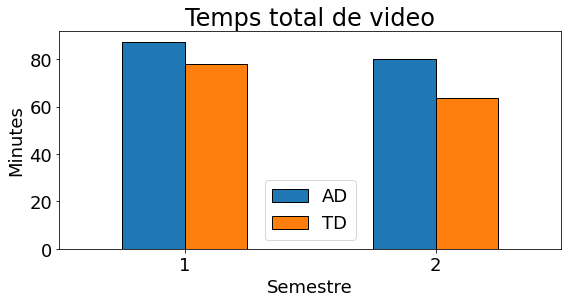

In [7]:
plot.plot_totals(agg, ec='k')

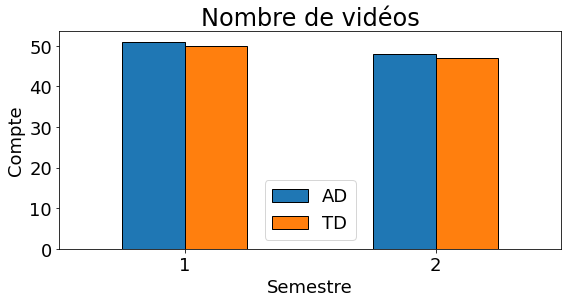

In [8]:
df = (agg.context(False)
    .groupby(['semester', 'group', 'video_id'])
    .agg({'duration': lambda x: 1}).rename(columns={'duration': 'count'}).reset_index()
    .groupby(['semester', 'group'])
    .agg({'count': np.sum}).reset_index()
)
table = df.pivot_table('count', ['semester'], ['group'])

fig = plt.figure(figsize=(9, 4))
ax = fig.gca()
table.plot.bar(rot=0, ax=ax, ec='k')
plot.readable_ax(ax, 'Nombre de vidéos', 'Semestre', 'Compte')

In [9]:
(agg.context(False)
    .groupby(['semester', 'group', 'baby'])
    .agg({'duration': lambda x: 1}).rename(columns={'duration': 'count'}).reset_index()
    .groupby(['semester', 'group'])
    .agg(np.sum).reset_index()
)

,semester,group,count
0,1,AD,10.0
1,1,TD,10.0
2,2,AD,10.0
3,2,TD,10.0


# Chronograms

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


<AxesSubplot:title={'center':'Claudio_(0-6)_4'}, xlabel='temps (sec)'>

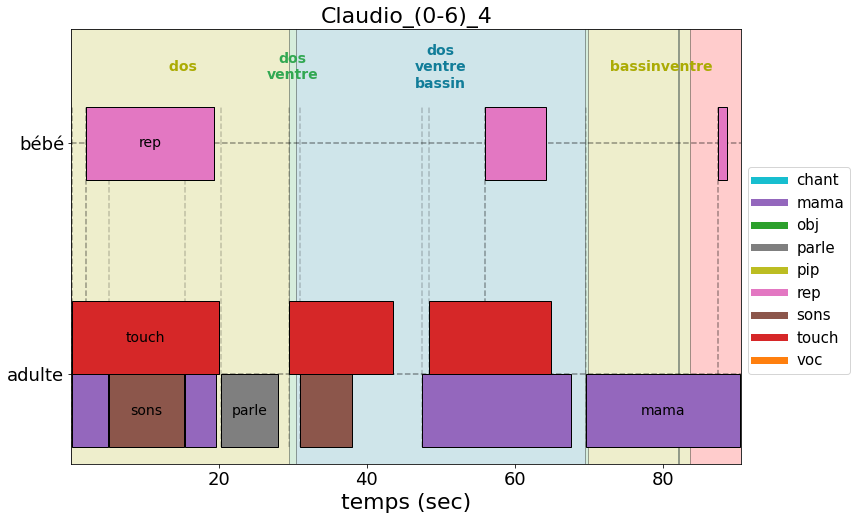

In [10]:
video_ids = list(c.df.video_id.unique())
viz = visualizer.AnnotationsVisualizer(tags=c.tags)
viz.chronogram(c, 'Claudio_(0-6)_4')  #video_ids[21]
# plt.savefig('/home/olivier/dev/bullinger/figures/chronogram.pdf', dpi=300, bbox_inches='tight')

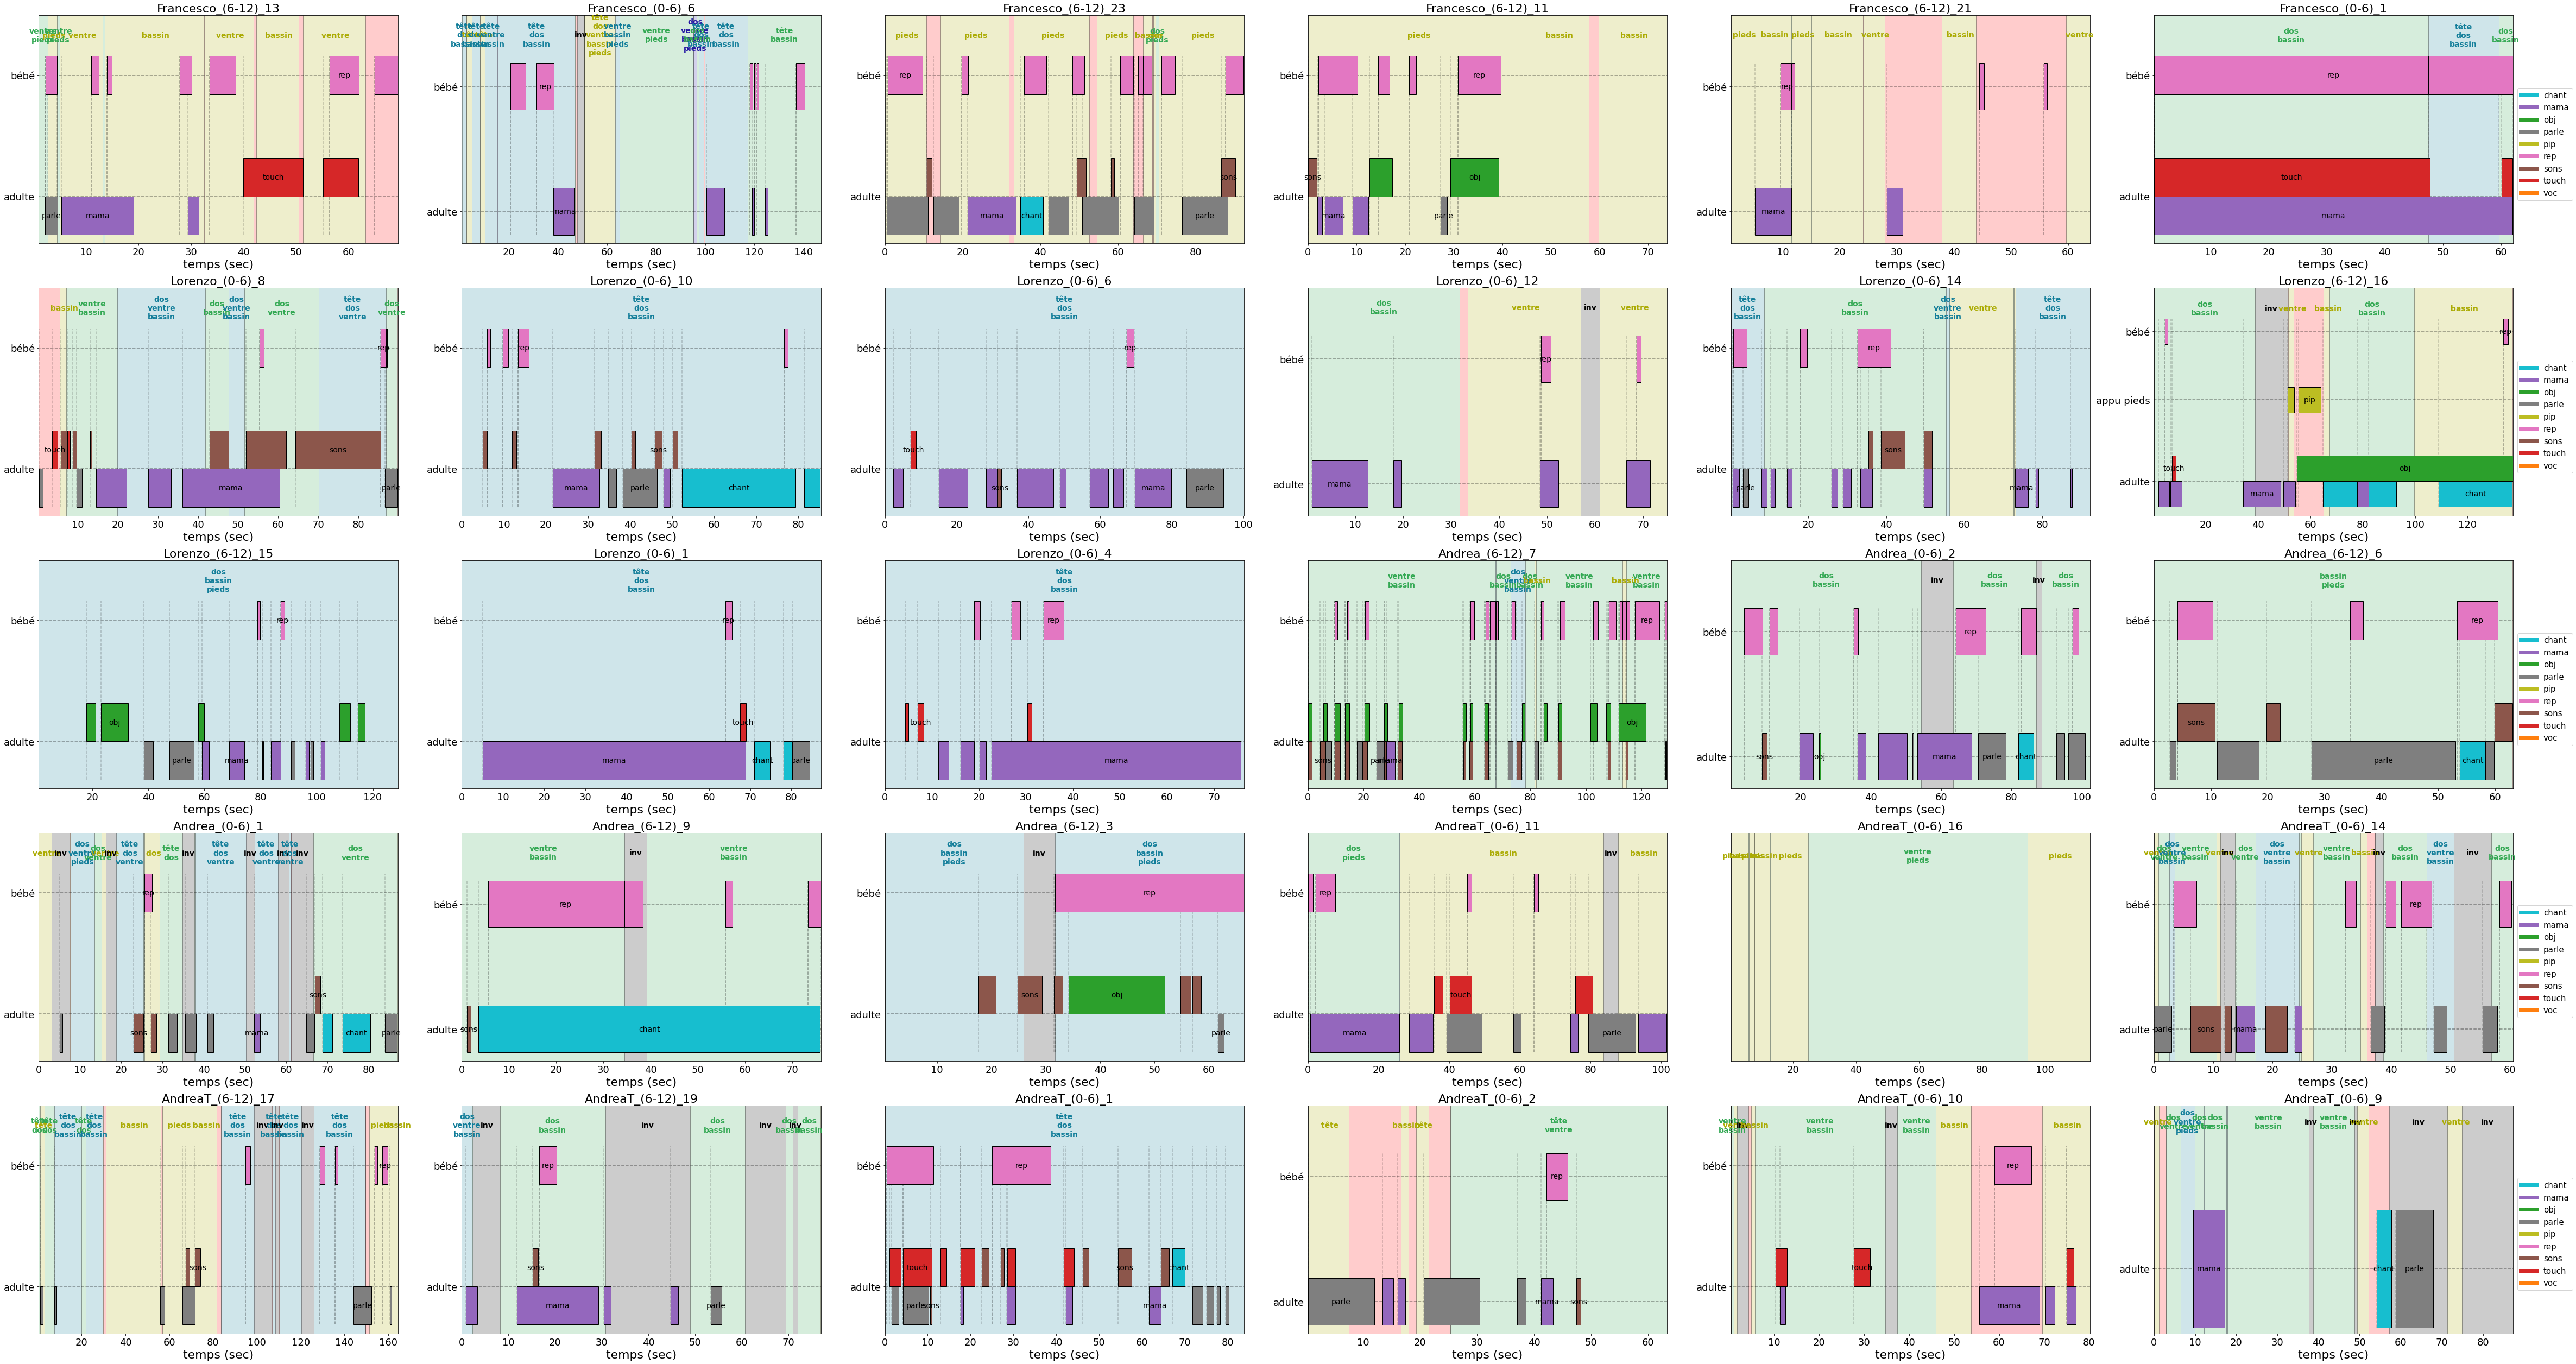

In [11]:
plot.plot_many_chronograms(c, num_rows=5, num_cols=6)

# Temps de stimulation

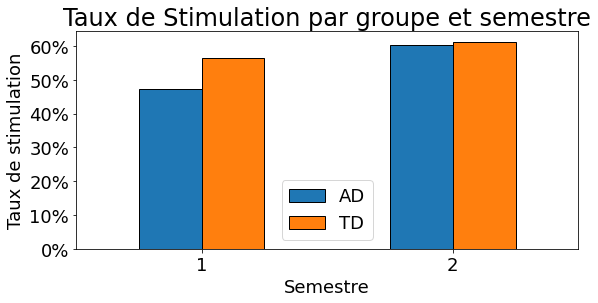

In [12]:
df = agg.stimulations(per_tag=False, relative=True)

plt.figure(figsize=(9, 4))
ax = plt.gca()
col = 'relative'
i = 1
table = df.pivot_table(col, ['semester'], ['group']) / (60 if i == 0 else 1)
table.plot.bar(rot=0, ax=ax, ec='k')
plot.readable_ax(ax, 'Taux de Stimulation par groupe et semestre', 'Semestre', 'Taux de stimulation')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.savefig('/home/olivier/dev/bullinger/figures/stimulations.pdf', dpi=300, bbox_inches='tight')

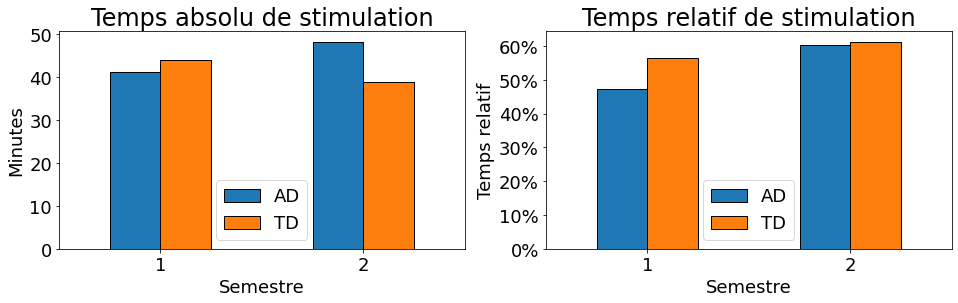

In [13]:
plot.plot_stimulations(agg, ec='k')

# Types de stimulations

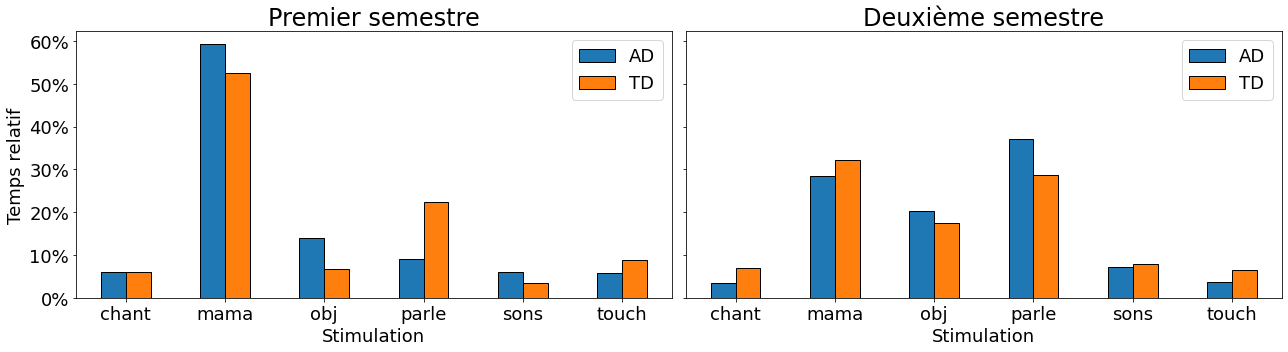

In [179]:
stim_df = agg.stimulations(per_tag=True, relative=True)
stim_df = stim_df[stim_df.tag != 'rep']
plot.plot_per(stim_df,
              'tag', ['in_stimulation'], 'Stimulation', ['Temps relatif'],
              flip=False, percent=True,
              ec='k')
plt.savefig('/home/olivier/dev/bullinger/figures/type_stimulations.pdf', dpi=300, bbox_inches='tight')

# Temps avec appui

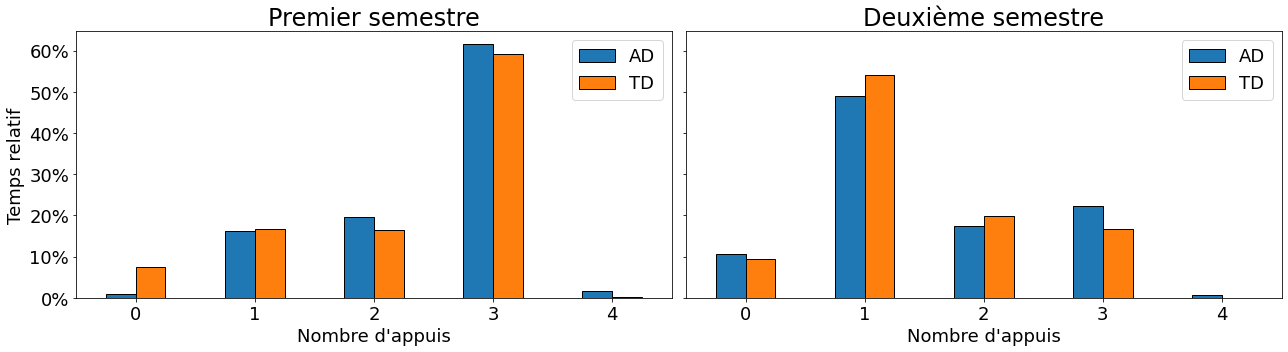

In [180]:
aggregator = importlib.reload(aggregator)
agg = aggregator.Aggregator(c)
plot.plot_per(agg.supports(relative=True, min_support=0, max_support=4).reset_index(),
              rows=['relative'], labels=['Temps relatif'],
              flip=False, percent=True,
              ec='k')
plt.savefig('/home/olivier/dev/bullinger/figures/appuis.pdf', dpi=300, bbox_inches='tight')

# Appui et reponses

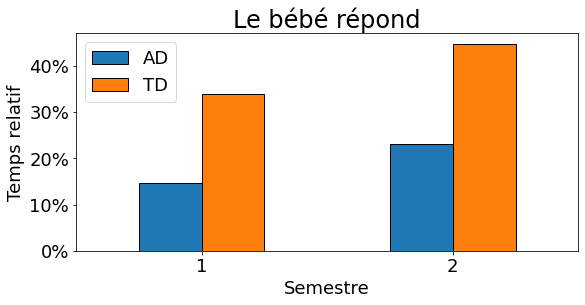

In [44]:
plot.plot_response(agg, ec='k', decimals=0)
plt.savefig('/home/olivier/dev/bullinger/figures/reponse.pdf', dpi=300, bbox_inches='tight')

In [648]:
os.getcwd()

'/home/olivier/dev/bullinger/notebooks'

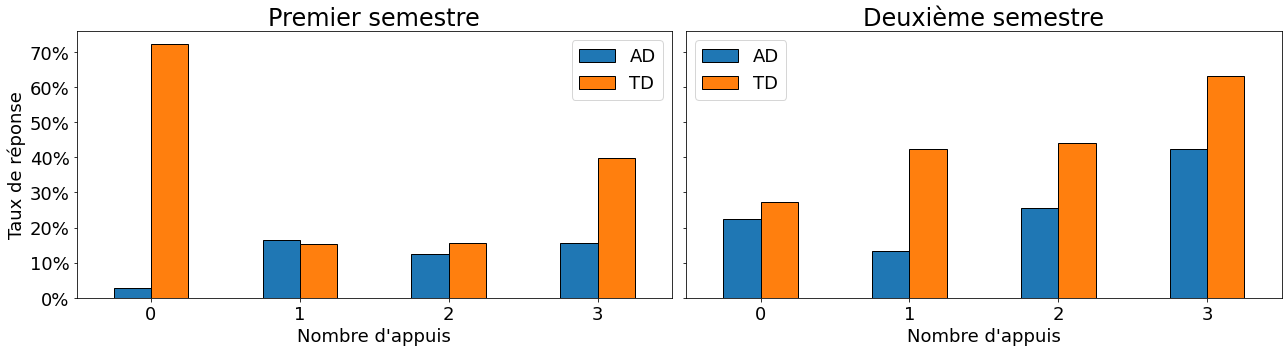

In [46]:
plot.plot_per(agg.responds_with_support(min_support=0, max_support=4),
              rows=['proba'], labels=['Taux de réponse'],
              flip=False, percent=True,
              ec='k')
# plt.savefig('/home/olivier/dev/bullinger/figures/reponse_appuis.pdf', dpi=300, bbox_inches='tight')

# Temps invisible

total
group semester          
AD    1         0.036904
      2         0.036604
TD    1         0.032506
      2         0.036825

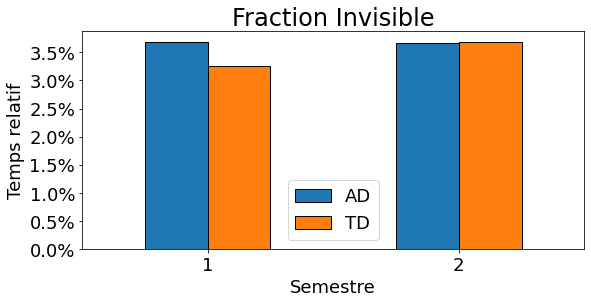

In [47]:
plot.plot_invisible(agg, ec='k')

# Are those number significant ?

In [48]:
aggregator = importlib.reload(aggregator)
agg = aggregator.Aggregator(c)
dd = agg.per_video_responses()
dd

,support,group,semester,video_id,support_duration,tag,duration,ratio
2,0,AD,1,Claudio_(0-6)_4,6.926,rep,1.130,0.163153
12,0,AD,1,Luca_(0-6)_18,0.100,rep,0.050,0.500000
17,0,AD,1,Marta_(0-6)_21,3.449,rep,0.080,0.023195
24,0,AD,2,Arianna_(6-12)_7,3.989,rep,0.146,0.036601
25,0,AD,2,Carlo_(6-12)_10,0.093,rep,0.093,1.000000
...,...,...,...,...,...,...,...,...
502,3,TD,2,StefanoD_(6-12)_22,74.128,rep,57.956,0.781837
503,3,TD,2,Stefano_(6-12)_19,70.131,rep,70.131,1.000000
505,4,AD,1,Manuel_(0-6)_5,66.000,rep,0.880,0.013333
506,4,AD,2,Arianna_(6-12)_08,5.489,rep,1.779,0.324103


In [473]:
agg.statistical_test(test_fn=scipy.stats.kruskal)

(True, 0.5273465682473284)

In [389]:
def get_events(c, support=None, semester=2, group='AD', min_duration=3):
    result = c.df[(c.df.tag == 'rep') &
                  (c.df.semester == semester) &
                  (c.df.group == group) &
                  (c.df.duration > min_duration)]
    if support is not None:
        result = result[result.support == support]
    return result

In [603]:
get_events(c, support=3, semester=2, group='TD', min_duration=0).baby.unique().shape[0]

10

In [403]:
dfr = get_events(c, support=3, semester=2, group='TD', min_duration=0)
dfr[dfr.baby == 'Flavio'].duration.sum() / dfr.duration.sum()


0.8534348638485173

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


<AxesSubplot:title={'center':'Manuel_(6-12)_11'}, xlabel='temps (sec)'>

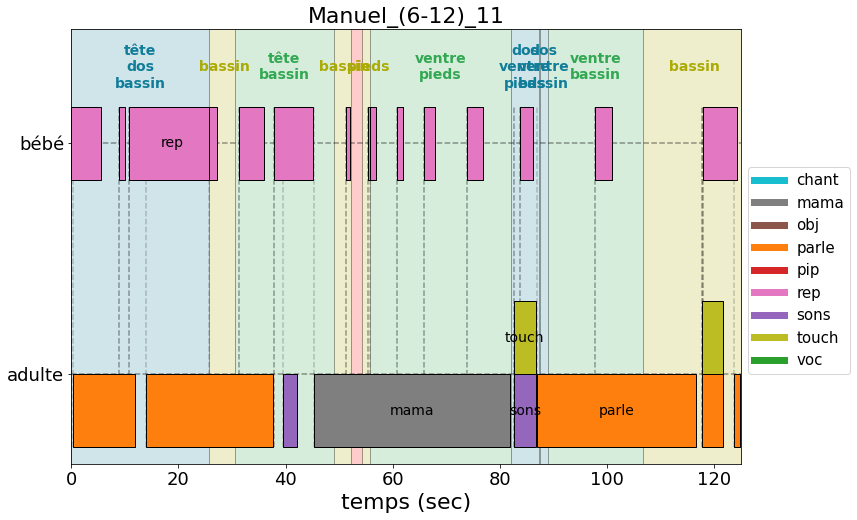

In [405]:
viz.chronogram(c, 'Manuel_(6-12)_11')

In [406]:
aggregator = importlib.reload(aggregator)
agg = aggregator.Aggregator(c)
dd = agg.responses_distribution()
# dd.reset_index().join(agg.responds.reset_index(), on=['group', 'semester'], how='outer')
left = pd.pivot_table(dd.reset_index(), index=['group', 'semester', 'support']).rename(columns={'duration': 'responds'})
right = pd.pivot_table(agg.responds.reset_index(), index=['group', 'semester'])
dd = left.join(right, how='outer')
dd = dd.join(agg.supports(max_support=5), lsuffix='_overall', rsuffix='_support').reset_index()
dd = dd.drop(columns=['duration', 'relative_overall', 'minutes'])
dd = dd.rename(columns={'response': 'total_response', 'relative_support': 'p(s)'})
dd['p(r)'] = dd.responds / dd.total_response
dd['p(r|s)']  = dd.responds /  dd.support_time
dd
# dd['responds'] /= dd['response']
# plot.plot_per(dd, rows=['responds'], labels=['minutes'], ec='k', percent=False)


,group,semester,support,responds,total_response,support_time,total,p(s),p(r),p(r|s)
0,AD,1,0,1.210,553.739,44.190,4384.747,0.010078,0.002185,0.027382
1,AD,1,1,87.497,553.739,710.472,4384.747,0.162033,0.158011,0.123153
2,AD,1,2,69.960,553.739,819.579,4384.747,0.186916,0.126341,0.085361
3,AD,1,3,394.192,553.739,2725.807,4384.747,0.621657,0.711873,0.144615
4,AD,1,4,0.880,553.739,84.699,4384.747,0.019317,0.001589,0.010390
5,AD,2,0,112.140,929.897,482.621,4072.480,0.118508,0.120594,0.232356
6,AD,2,1,269.413,929.897,2116.804,4072.480,0.519783,0.289723,0.127273
7,AD,2,2,154.459,929.897,675.171,4072.480,0.165789,0.166103,0.228770
8,AD,2,3,383.727,929.897,768.107,4072.480,0.188609,0.412655,0.499575
9,AD,2,4,10.158,929.897,29.777,4072.480,0.007312,0.010924,0.341136


In [276]:
dd[(dd.group == 'AD') & (dd.semester == 2)]

,group,semester,support,responds,total_response,support_time,total,p(s),p(r),p(r|s)
5,AD,2,0,97.244,708.938,467.708,4095.184,0.114209,0.137169,0.207916
6,AD,2,1,258.311,708.938,2243.243,4095.184,0.547776,0.364363,0.115151
7,AD,2,2,80.094,708.938,565.518,4095.184,0.138093,0.112977,0.141629
8,AD,2,3,273.289,708.938,789.510,4095.184,0.192790,0.385491,0.346150


In [275]:
agg.responds_with_support()

semester  response  support_time     total  relative  \
group support                                                         
AD    0               1     1.210        44.190  4384.747  0.010078   
      1               1    84.457       710.472  4384.747  0.162033   
      2               1    69.960       819.579  4384.747  0.186916   
      3               1   376.636      2725.807  4384.747  0.621657   
      4               1     0.880           NaN       NaN       NaN   
      0               2    97.244       467.708  4095.184  0.114209   
      1               2   258.311      2243.243  4095.184  0.547776   
      2               2    80.094       565.518  4095.184  0.138093   
      3               2   273.289       789.510  4095.184  0.192790   
TD    0               1   241.427       335.370  5192.944  0.064582   
      1               1   155.490       865.029  5192.944  0.166578   
      2               1   159.549       914.340  5192.944  0.176074   
      3               1  1054.753      3057.750  5192.944  0.588828   
      0               2    87.162       357.110  4230.252  0.084418   
      1               2   850.294      2139.128  4230.252  0.505674   
      2               2   373.975       861.894  4230.252  0.203745   
      3               2   429.879       872.120  4230.252  0.206163   

                 minutes     proba  
group support                       
AD    0         0.020167  0.027382  
      1         1.407617  0.118874  
      2         1.166000  0.085361  
      3         6.277267  0.138174  
      4         0.014667       NaN  
      0         1.620733  0.207916  
      1         4.305183  0.115151  
      2         1.334900  0.141629  
      3         4.554817  0.346150  
TD    0         4.023783  0.719883  
      1         2.591500  0.179751  
      2         2.659150  0.174496  
      3        17.579217  0.344944  
      0         1.452700  0.244076  
      1        14.171567  0.397496  
      2         6.232917  0.433899  
      3         7.164650  0.492913

# 3 appuis au 2eme semestre

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


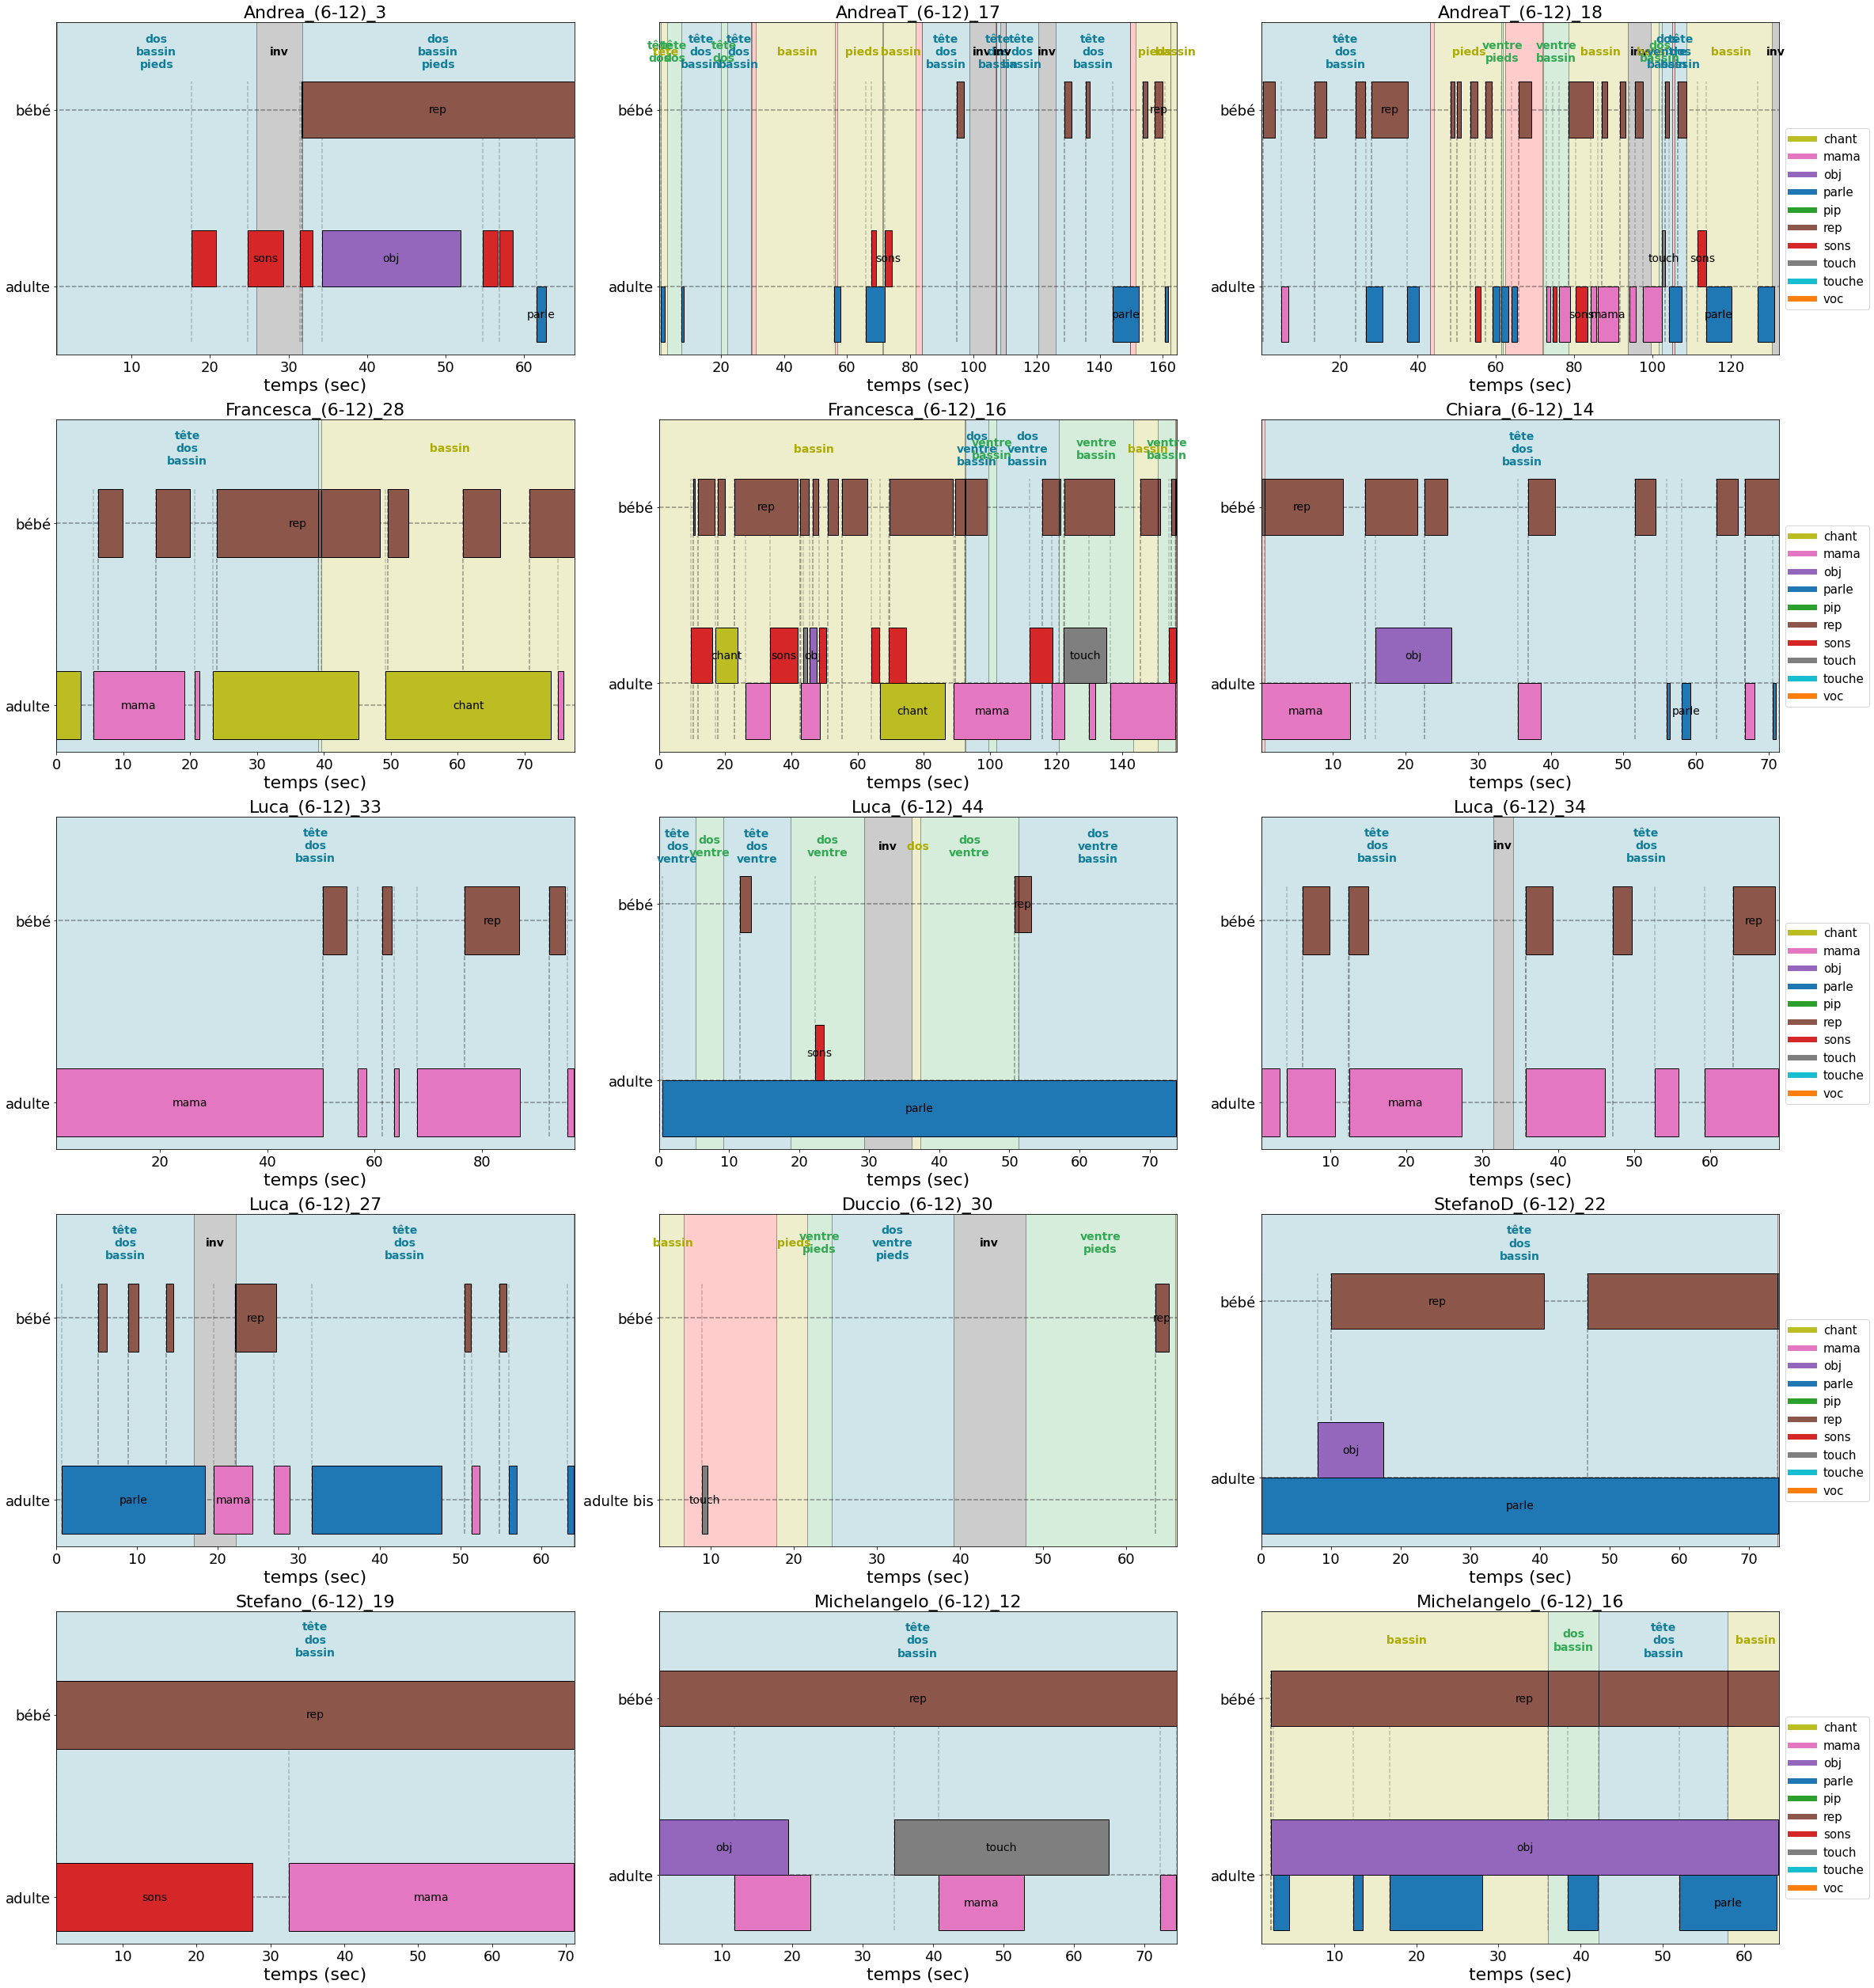

In [417]:
video_2_3 = c.df[(c.df.semester == 2) &
                 (c.df.group == 'TD') & 
                 (c.df.support == 3) &
                 (c.df.duration > 10)].video_id.unique()

plot.plot_chronograms(c, video_2_3)

# Playing with tests: a verifier

In [97]:
import importlib
from bullinger import aggregator
aggregator = importlib.reload(aggregator)

df2 = agg.df[agg.df.video_id == 'Francesco_(6-12)_13']
df2
# df2 = agg.df[agg.df.actor == 'contexte']
# df2[df2['video_id'] == 'Francesco_(6-12)_13'][['start', 'end', 'context']]

,index,actor,context,duration,end,start,support,tag,video_id,baby,group,observer,semester
0,0,adulte,NaN,2.334,4.584,2.250,0,parle,Francesco_(6-12)_13,Francesco,TD,home,2
1,1,adulte,NaN,13.747,19.121,5.374,0,mama,Francesco_(6-12)_13,Francesco,TD,home,2
2,2,adulte,NaN,2.015,31.430,29.415,0,mama,Francesco_(6-12)_13,Francesco,TD,home,2
3,3,adulte bis,NaN,11.419,51.350,39.931,0,touch,Francesco_(6-12)_13,Francesco,TD,home,2
4,4,adulte bis,NaN,6.743,61.824,55.081,0,touch,Francesco_(6-12)_13,Francesco,TD,home,2
5,5,bébé,NaN,2.225,4.525,2.300,0,rep,Francesco_(6-12)_13,Francesco,TD,home,2
6,6,bébé,NaN,1.320,12.310,10.990,0,rep,Francesco_(6-12)_13,Francesco,TD,home,2
7,7,bébé,NaN,0.786,14.806,14.020,0,rep,Francesco_(6-12)_13,Francesco,TD,home,2
8,8,bébé,NaN,2.127,30.015,27.888,0,rep,Francesco_(6-12)_13,Francesco,TD,home,2
9,9,bébé,NaN,4.890,38.380,33.490,0,rep,Francesco_(6-12)_13,Francesco,TD,home,2


In [95]:
df = agg.df
ids = list(df['video_id'].unique())
df = df[df.video_id == ids[0]]
c.context_df[c.context_df.video_id == 'Francesco_(6-12)_13'][['start', 'end', 'context']]
# agg.df[agg.df.actor == 'contexte']
# df2 = df[df.actor.str.startswith('adult')]
# df2
# utils.get_intervals(df2)

,start,end,context
0,1.026,1.036,ventre
1,1.036,2.726,"ventre, pieds"
2,2.726,4.501,pieds
3,4.501,5.008,"ventre, pieds"
4,5.008,13.212,ventre
5,13.212,13.600,"ventre, bassin"
6,13.600,32.400,bassin
7,32.400,32.461,sans
8,32.461,41.865,ventre
9,41.865,42.415,sans


In [67]:
def per_video(agg):
    def _aux(df):
        result = {}
        for k in ['baby'] +  agg.GROUPBY:
            result[k] = df[k].unique()[0]

        df2 = df[(~df.context.isnull())]
        result['duration'] = df2.duration.sum()
        
        stimul = utils.get_intervals(df[df.actor.str.startswith('adult')])
        result['stimulation'] = utils.length(stimul) / result['duration']

        total_responses = df[df.tag.isin(['rep', 'init'])].duration.sum()
        result['response'] = total_responses / result['duration']

        return pd.Series(result)

    return agg.df.groupby('video_id').apply(_aux).reset_index()

In [69]:
agg = aggregator.Aggregator(c)
df = per_video(agg)
df.duration.mean(), df.duration.sem()

(94.60405102040816, 2.113515356052382)

In [77]:
df3 = agg.df[agg.df.video_id == df.iloc[df.stimulation.argmax()].video_id]



,index,actor,context,duration,end,start,support,tag,video_id,baby,group,observer,semester
1865,0,adulte,NaN,4.045,15.892,11.847,0,mama,Claudio_(6-12)_10,Claudio,AD,home,2
1866,1,adulte,NaN,2.980,34.292,31.312,0,mama,Claudio_(6-12)_10,Claudio,AD,home,2
1867,2,adulte,NaN,10.601,46.271,35.670,0,mama,Claudio_(6-12)_10,Claudio,AD,home,2
1868,3,adulte,NaN,13.824,63.764,49.940,0,mama,Claudio_(6-12)_10,Claudio,AD,home,2
1869,4,adulte,NaN,12.523,115.018,102.495,0,mama,Claudio_(6-12)_10,Claudio,AD,home,2
1870,5,adulte bis,NaN,114.019,115.018,0.999,0,obj,Claudio_(6-12)_10,Claudio,AD,home,2
1871,0,contexte,bassin,114.110,115.109,0.999,1,None,Claudio_(6-12)_10,Claudio,AD,home,2
1872,1,contexte,sans,0.009,115.118,115.109,0,None,Claudio_(6-12)_10,Claudio,AD,home,2


# Finding non responding babies 

In [207]:
mute_df = df[(df.group == 'AD') & (df.semester == 1) & (df.stimulation > 0.2) & (df.response < 0.03)]
mute_df

,video_id,baby,group,semester,duration,stimulation,response
17,Arianna_(0-6)_2,Arianna,AD,1,99.042,0.270653,0.000000
42,Claudio_(0-6)_2,Claudio,AD,1,156.677,0.493863,0.000000
45,Claudio_(0-6)_5,Claudio,AD,1,79.963,0.628353,0.000000
46,Claudio_(0-6)_6,Claudio,AD,1,121.557,0.858642,0.025782
118,Lorenzo_(0-6)_1,Lorenzo,AD,1,87.193,0.848853,0.017845
123,Lorenzo_(0-6)_6,Lorenzo,AD,1,100.120,0.566950,0.020086
129,Luca_(0-6)_17,LucaS,AD,1,133.136,0.865897,0.000000
142,Manuel_(0-6)_5,Manuel,AD,1,66.332,0.832901,0.013267
152,Marta_(0-6)_03,Marta,AD,1,65.484,0.424440,0.000000
156,Marta_(0-6)_20,Marta,AD,1,72.233,0.341880,0.027065


/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


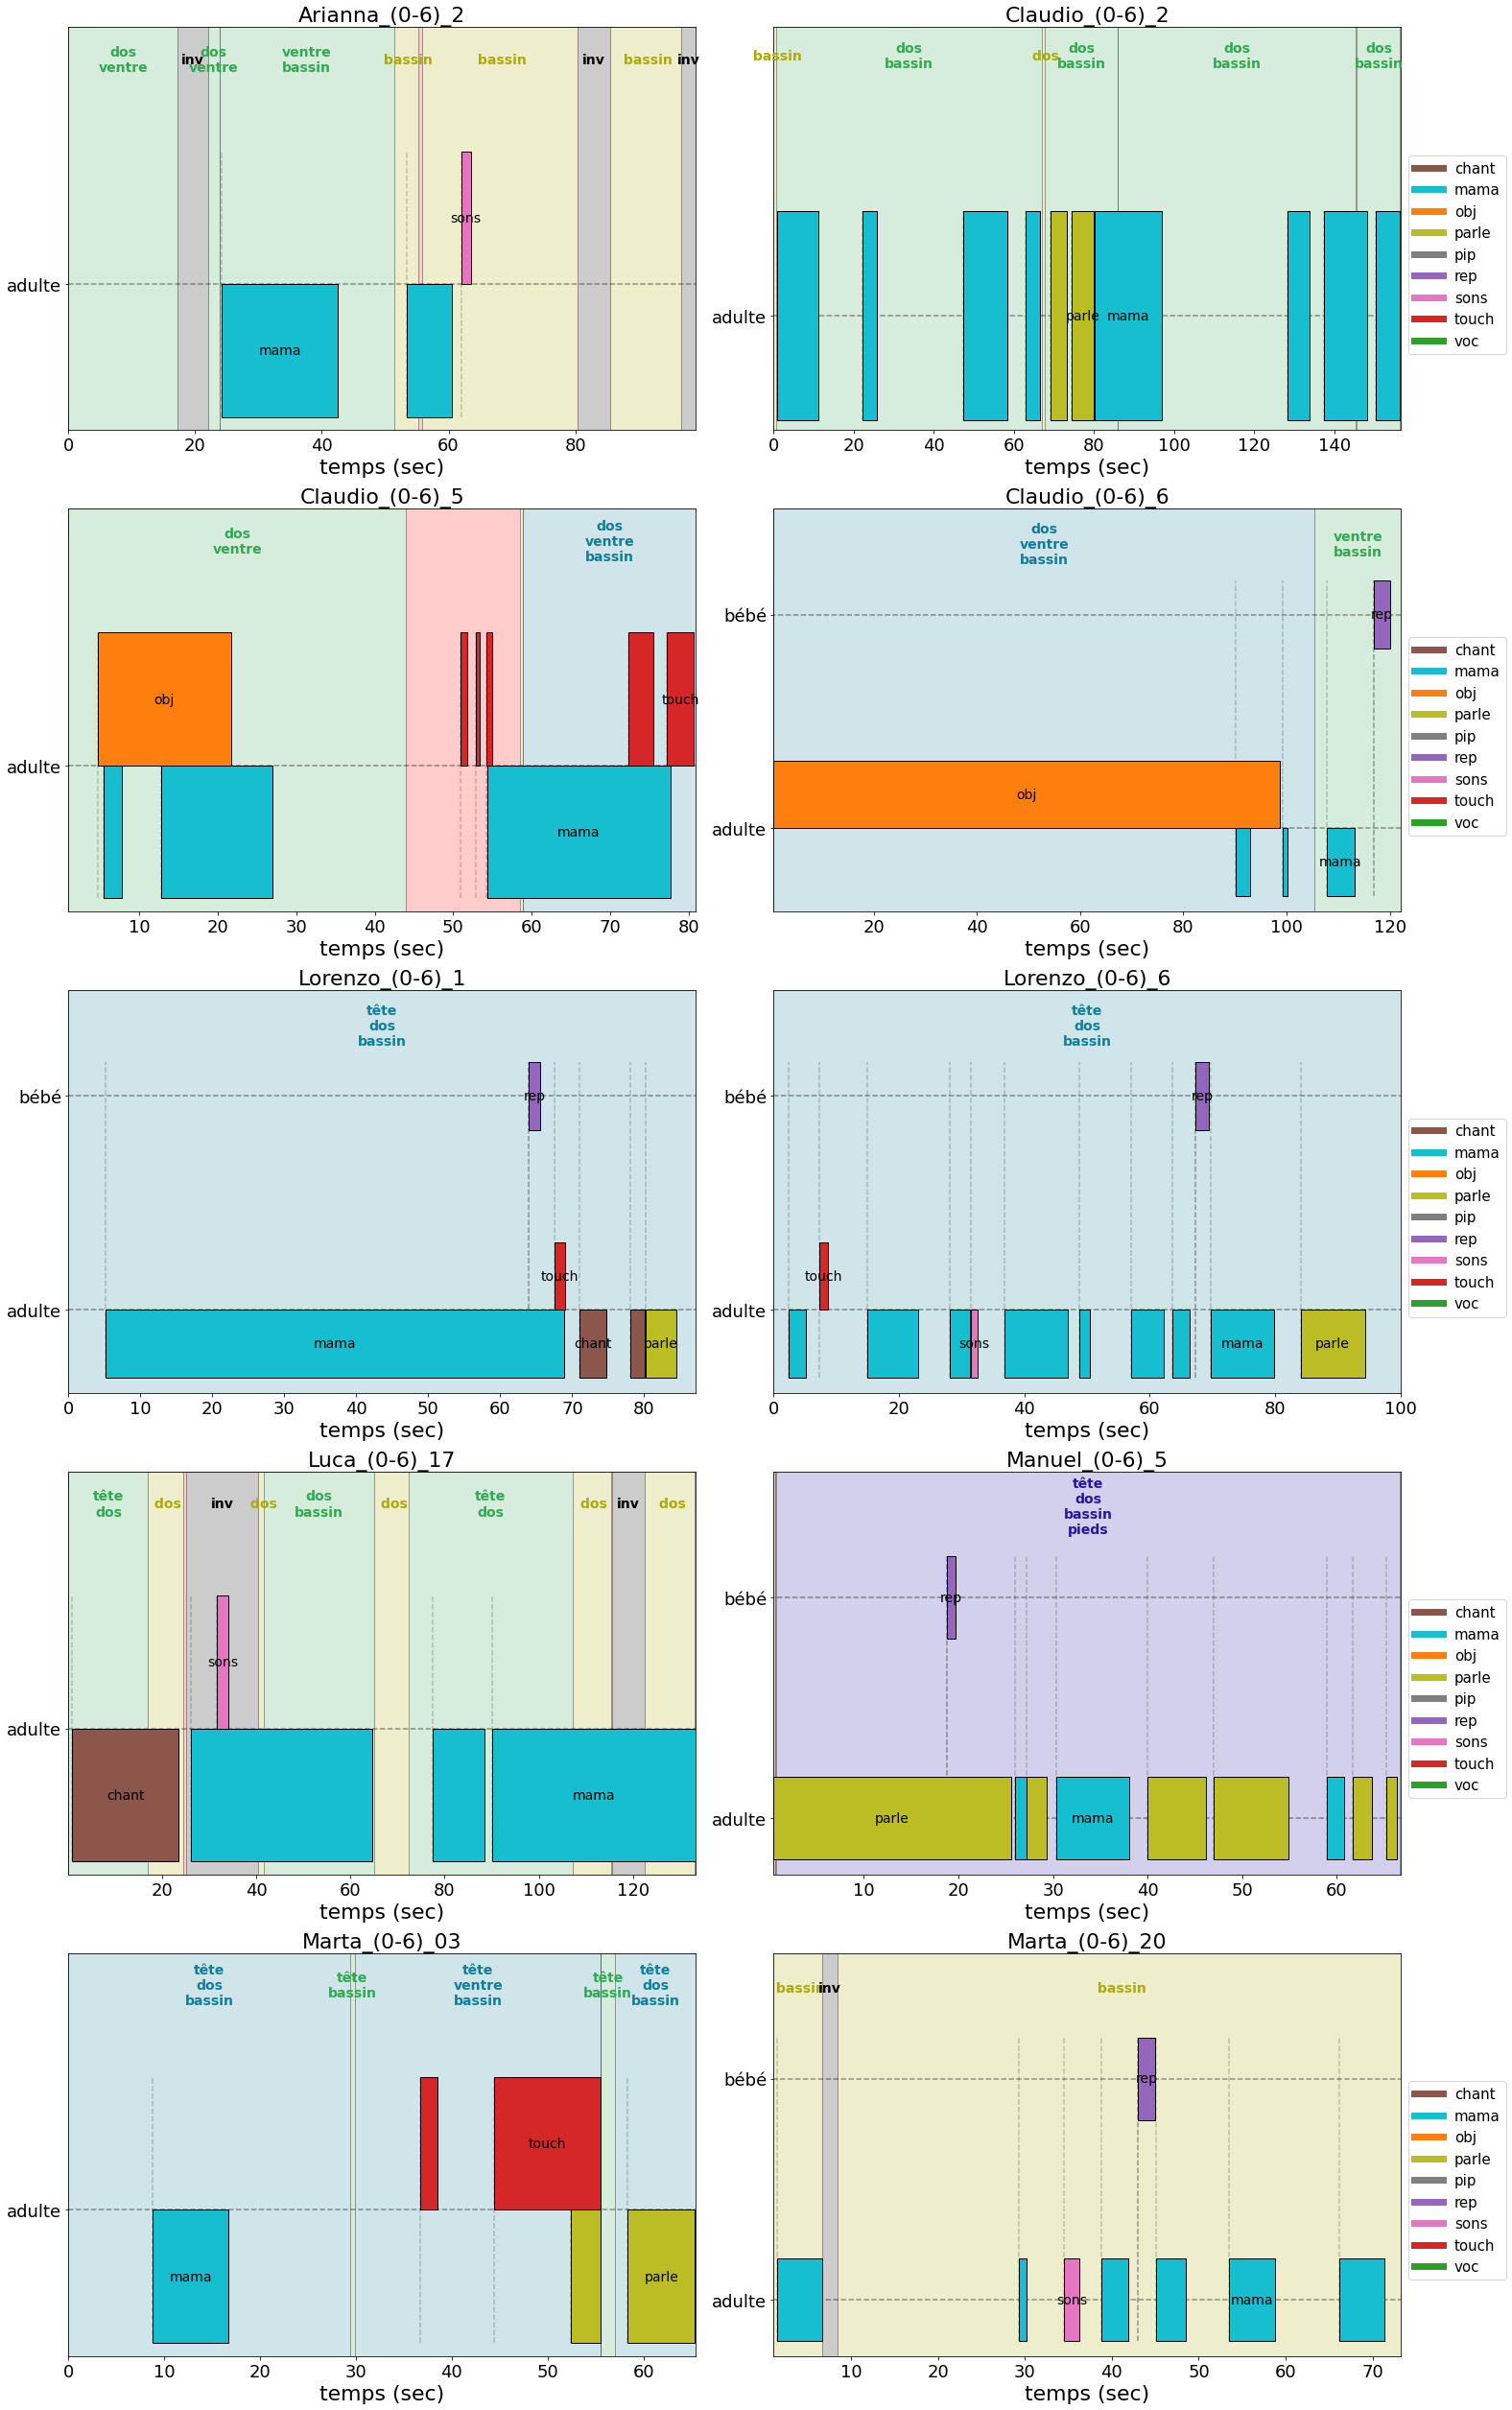

In [205]:
plot.plot_many_chronograms(c, mute_df.video_id.unique().tolist(), num_rows=5, num_cols=2)

In [184]:
df.groupby(['group', 'semester']).agg({'stimulation': [np.mean, 'sem'], 'response': [np.mean, 'sem']})

stimulation            response          
                      mean       sem      mean       sem
group semester                                          
AD    1           0.456046  0.042395  0.154371  0.028302
      2           0.497581  0.048511  0.211153  0.032206
TD    1           0.531847  0.040094  0.313796  0.046107
      2           0.552308  0.044582  0.453341  0.047305

In [185]:
df = agg.context(visible=True)
df = df[df.video_id == 'Stefano_(0-6)_10']
df[df.tag.isin(['rep', 'init'])].duration.sum()

110.224

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


<AxesSubplot:title={'center':'Stefano_(0-6)_10'}, xlabel='temps (sec)'>

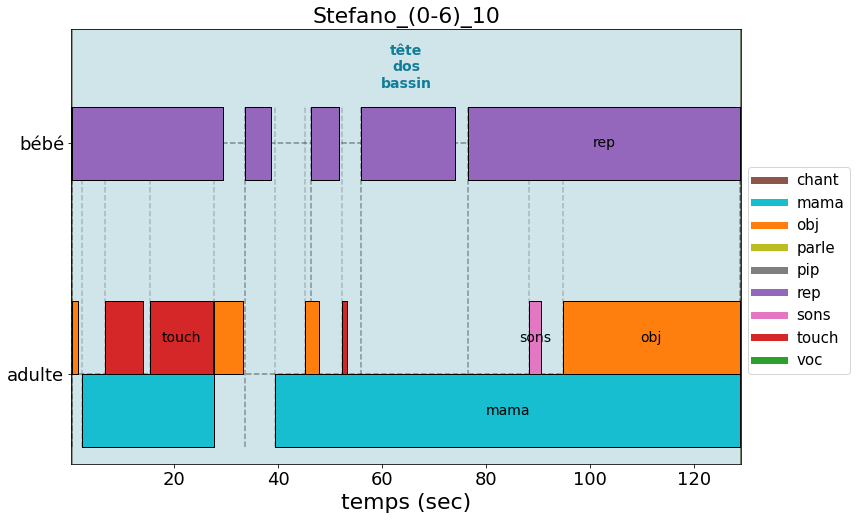

In [186]:
viz.chronogram(c, 'Stefano_(0-6)_10')

/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


<AxesSubplot:title={'center':'Francesca_(6-12)_24'}, xlabel='temps (sec)'>

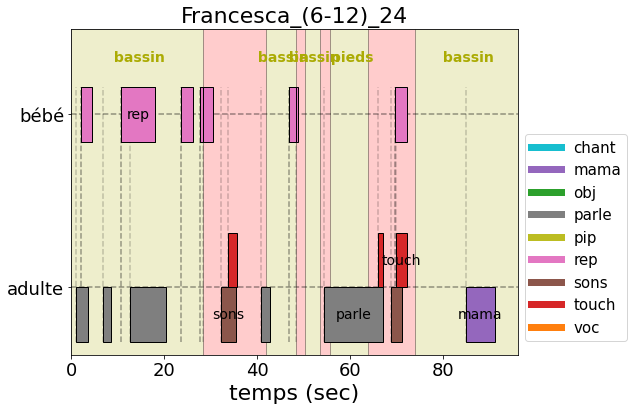

In [920]:
filenames = glob.glob('/home/olivier/dev/data/laura_codage/**/*.txt')
filename = filenames[47]
video_id = os.path.basename(filename)[:-4]
viz = visualizer.AnnotationsVisualizer(height=6, width=8, tags=c.tags)
viz.chronogram(c, video_id=video_id)